<a href="https://colab.research.google.com/github/worldwidekatie/Speed_Dating_Simulation/blob/main/speed_dating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speed Dating Simulation Data Wrangling and Model Training

https://www.openml.org/d/40536

Author: Ray Fisman and Sheena Iyengar
Source: [Columbia Business School](http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/) - 2004
Please cite: None

This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

### Attribute Information
```
* gender: Gender of self
* age: Age of self
* age_o: Age of partner
* d_age: Difference in age
* race: Race of self
* race_o: Race of partner
* samerace: Whether the two persons have the same race or not.
* importance_same_race: How important is it that partner is of same race?
* importance_same_religion: How important is it that partner has same religion?
* field: Field of study
* pref_o_attractive: How important does partner rate attractiveness
* pref_o_sinsere: How important does partner rate sincerity
* pref_o_intelligence: How important does partner rate intelligence
* pref_o_funny: How important does partner rate being funny
* pref_o_ambitious: How important does partner rate ambition
* pref_o_shared_interests: How important does partner rate having shared interests
* attractive_o: Rating by partner (about me) at night of event on attractiveness
* sincere_o: Rating by partner (about me) at night of event on sincerity
* intelligence_o: Rating by partner (about me) at night of event on intelligence
* funny_o: Rating by partner (about me) at night of event on being funny
* ambitous_o: Rating by partner (about me) at night of event on being ambitious
* shared_interests_o: Rating by partner (about me) at night of event on shared interest
* attractive_important: What do you look for in a partner - attractiveness
* sincere_important: What do you look for in a partner - sincerity
* intellicence_important: What do you look for in a partner - intelligence
* funny_important: What do you look for in a partner - being funny
* ambtition_important: What do you look for in a partner - ambition
* shared_interests_important: What do you look for in a partner - shared interests
* attractive: Rate yourself - attractiveness
* sincere: Rate yourself - sincerity
* intelligence: Rate yourself - intelligence
* funny: Rate yourself - being funny
* ambition: Rate yourself - ambition
* attractive_partner: Rate your partner - attractiveness
* sincere_partner: Rate your partner - sincerity
* intelligence_partner: Rate your partner - intelligence
* funny_partner: Rate your partner - being funny
* ambition_partner: Rate your partner - ambition
* shared_interests_partner: Rate your partner - shared interests
* sports: Your own interests [1-10]
* tvsports
* exercise
* dining
* museums
* art
* hiking
* gaming
* clubbing
* reading
* tv
* theater
* movies
* concerts
* music
* shopping
* yoga
* interests_correlate: Correlation between participant’s and partner’s ratings of interests.
* expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?
* expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?
* expected_num_matches: How many matches do you expect to get?
* like: Did you like your partner?
* guess_prob_liked: How likely do you think it is that your partner likes you?
* met: Have you met your partner before?
* decision: Decision at night of event.
* decision_o: Decision of partner at night of event.
* match: Match (yes/no)
```

### Relevant paper

Raymond Fisman; Sheena S. Iyengar; Emir Kamenica; Itamar Simonson.
Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.
The Quarterly Journal of Economics, Volume 121, Issue 2, 1 May 2006, Pages 673–697,
[https://doi.org/10.1162/qjec.2006.121.2.673](https://doi.org/10.1162/qjec.2006.121.2.673)

# Begin with data wrangling

In [157]:
import pandas as pd

In [360]:
df = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Speed_Dating_Simulation/main/data/speeddating.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
df.head(5)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,...,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30,10,20,10,10,20,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8,7,9,6,9,7,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],3,2,4,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [361]:
# Create unique IDs for each person
ids = {}
people = {}
count = 0
for i in range(0, len(df)):
  person = df['gender'][i] + str(df['age'][i]) + df['race'][i] + str(df['attractive_important'][i]) + str(df['sincere_important'][i]) + str(df['intellicence_important'][i]) + str(df['funny_important'][i]) + str(df['ambtition_important'][i]) + str(df['shared_interests_important'][i])
  if person not in people:
    people[person] = [i]
  else:
    people[person].append(i)

  if person not in ids:
    count += 1
    ids[person] = count

col_ids = []
for i in range(0, len(df)):
  person = df['gender'][i] + str(df['age'][i]) + df['race'][i] + str(df['attractive_important'][i]) + str(df['sincere_important'][i]) + str(df['intellicence_important'][i]) + str(df['funny_important'][i]) + str(df['ambtition_important'][i]) + str(df['shared_interests_important'][i])
  col_ids.append(ids[person])

df['id'] = col_ids

In [161]:
df['id'] = col_ids
df['id'].value_counts()

58     43
54     34
543    22
540    22
523    22
       ..
130     5
136     5
134     5
138     5
133     5
Name: id, Length: 546, dtype: int64

In [362]:
# Match people up with their dates by IDs
o_col_ids = []
for i in range(0, len(df)):
  if df['gender'][i] == 'male':
    person = 'female' + str(df['age_o'][i]) + df['race_o'][i] + str(df['pref_o_attractive'][i]) + str(df['pref_o_sincere'][i]) + str(df['pref_o_intelligence'][i]) + str(df['pref_o_funny'][i]) + str(df['pref_o_ambitious'][i]) + str(df['pref_o_shared_interests'][i])
  else:
    person = 'male' + str(df['age_o'][i]) + df['race_o'][i] + str(df['pref_o_attractive'][i]) + str(df['pref_o_sincere'][i]) + str(df['pref_o_intelligence'][i]) + str(df['pref_o_funny'][i]) + str(df['pref_o_ambitious'][i]) + str(df['pref_o_shared_interests'][i])
  o_col_ids.append(ids[person])

df['id_o'] = o_col_ids

In [363]:
# Give everyone a likelihood score

likelihoods = {}

for i in range(1, 547):
  df_temp = df[df['id'] == i]
  likelihoods[i] = sum(df_temp['decision'])/len(df_temp['decision'])

likelihood = []
for i in df.id:
  likelihood.append(likelihoods[i])

o_likelihood = []
for i in df.id_o:
  o_likelihood.append(likelihoods[i])


df['o_likelihood'] = o_likelihood
df['likelihood'] = likelihood

In [364]:
# Give everyone a room size label.

room_sizes = {}

for i in range(1, 22):
  df_wave = df[df['wave'] == i]
  size = len(set(list(df_wave.id)))
  room_sizes[i] = size

room_size = []
for i in df.wave:
  room_size.append(room_sizes[i])

df['room_size'] = room_size

In [365]:
# Give everyone a name
import random

women = df[df['gender'] == 'female'].reset_index()
women = set(list(women.id))
men = df[df['gender'] == 'male'].reset_index()
men = set(list(men.id))

names = pd.read_csv("https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv")
boys = set(names.head(500).name)
boys = list(boys)
random.shuffle(boys)

girls = []
for i in set(names.tail(500).name):
  if i not in boys:
    girls.append(i)

random.shuffle(girls)

name_id = {}
for i, n in enumerate(women):
  name_id[n] = girls[i]

for i, n in enumerate(men):
  name_id[n] = boys[i]

name = []
for i in df.id:
  name.append(name_id[i])

df['name'] = name

In [366]:
# Create a dictionary of people by ID with their attributes to
# Use for the simulation data

people = {}

for i in range(1, 547):
  df_temp = df[df['id'] == i]
  people[i] = {'name': list(df_temp['name'])[0],
               'gender': list(df_temp['gender'])[0],
               'age': list(df_temp['age'])[0],
               'race': list(df_temp['race'])[0],
               'field': list(df_temp['field'])[0],
               'importance_same_race': list(df_temp['importance_same_race'])[0],
               'importance_same_religion': list(df_temp['importance_same_religion'])[0],
               'likelihood': list(df_temp['likelihood'])[0],
               'attractive_important': list(df_temp['attractive_important'])[0],
               'sincere_important': list(df_temp['sincere_important'])[0],
               'intellicence_important': list(df_temp['intellicence_important'])[0],
               'funny_important': list(df_temp['funny_important'])[0],
               'ambtition_important': list(df_temp['ambtition_important'])[0],
               'attractive': list(df_temp['attractive'])[0],
               'sincere': list(df_temp['sincere'])[0],
               'intelligence': list(df_temp['intelligence'])[0],
               'funny': list(df_temp['funny'])[0],
               'ambition': list(df_temp['ambition'])[0],
               'shared_interests_important': list(df_temp['shared_interests_important'])[0],
               'sports': list(df_temp['sports'])[0],
               'tvsports': list(df_temp['tvsports'])[0],
               'exercise': list(df_temp['exercise'])[0],
               'dining': list(df_temp['dining'])[0],
               'museums': list(df_temp['museums'])[0],
               'art': list(df_temp['art'])[0],
               'hiking': list(df_temp['hiking'])[0],
               'gaming': list(df_temp['gaming'])[0],
               'clubbing': list(df_temp['clubbing'])[0],
               'reading': list(df_temp['reading'])[0],
               'tv': list(df_temp['tv'])[0],
               'theater': list(df_temp['theater'])[0],
               'movies': list(df_temp['movies'])[0],
               'concerts': list(df_temp['concerts'])[0],
               'music': list(df_temp['music'])[0],
               'shopping': list(df_temp['shopping'])[0],
               'yoga': list(df_temp['yoga'])[0],
               'expected_happy_with_sd_people': list(df_temp['expected_happy_with_sd_people'])[0],
               'status': 'single'
               }


In [367]:
# Save it as a JSON to use later in the simulation stuff.
import json
with open(f"people.json", "w") as outfile:  
  json.dump(people, outfile) 

from google.colab import files
files.download(f"people.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create the dataframes to train the model on

In [215]:
daters = pd.DataFrame(people).T
daters

,name,gender,age,race,field,importance_same_race,importance_same_religion,likelihood,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,attractive,sincere,intelligence,funny,ambition,shared_interests_important,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people
1,Helena,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
2,Emmy,female,24,European/Caucasian-American,law,2,5,0.4,45,5,25,20,0,7,5,10,8,3,5,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1,4
3,Clare,female,25,European/Caucasian-American,Economics,8,4,0,35,10,35,10,10,8,9,8,9,8,0,3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7,4
4,Cloe,female,23,European/Caucasian-American,Law,1,1,0.3,20,20,20,20,10,7,8,9,7,8,10,1,1,6,7,6,7,7,5,7,7,7,9,7,8,7,1,8,1
5,Kaylah,female,21,European/Caucasian-American,Law,8,1,0.6,20,5,25,25,10,6,3,6,10,8,15,7,4,7,7,6,8,6,6,8,6,8,6,6,3,7,8,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Alvah,male,30,European/Caucasian-American,Business,8,8,0.409091,40,10,20,10,0,10,10,10,10,10,20,10,8,4,10,3,2,2,5,1,9,6,4,6,7,10,4,1,7
543,Caleb,male,28,European/Caucasian-American,'General management/finance',2,3,0.409091,20,20,20,20,0,7,10,8,9,9,20,8,5,6,9,7,7,4,8,8,7,7,8,8,10,10,8,2,5
544,Arch,male,30,European/Caucasian-American,MBA,5,6,0.318182,30,3,30,30,3,7,7,7,7,7,4,5,3,5,9,7,8,3,3,8,8,3,7,7,4,6,6,3,7
545,Frances,male,27,'Black/African American',Business,2,1,0.363636,40,20,20,20,0,7,8,3,8,5,0,6,1,7,6,7,3,2,1,7,10,2,5,6,7,7,7,1,3


In [216]:
daters_o = {}
for i in list(daters):
  daters_o[i] = i + "_o"

partners = daters.rename(columns=daters_o)
partners

,name_o,gender_o,age_o,race_o,field_o,importance_same_race_o,importance_same_religion_o,likelihood_o,attractive_important_o,sincere_important_o,intellicence_important_o,funny_important_o,ambtition_important_o,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_important_o,sports_o,tvsports_o,exercise_o,dining_o,museums_o,art_o,hiking_o,gaming_o,clubbing_o,reading_o,tv_o,theater_o,movies_o,concerts_o,music_o,shopping_o,yoga_o,expected_happy_with_sd_people_o
1,Helena,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
2,Emmy,female,24,European/Caucasian-American,law,2,5,0.4,45,5,25,20,0,7,5,10,8,3,5,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1,4
3,Clare,female,25,European/Caucasian-American,Economics,8,4,0,35,10,35,10,10,8,9,8,9,8,0,3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7,4
4,Cloe,female,23,European/Caucasian-American,Law,1,1,0.3,20,20,20,20,10,7,8,9,7,8,10,1,1,6,7,6,7,7,5,7,7,7,9,7,8,7,1,8,1
5,Kaylah,female,21,European/Caucasian-American,Law,8,1,0.6,20,5,25,25,10,6,3,6,10,8,15,7,4,7,7,6,8,6,6,8,6,8,6,6,3,7,8,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Alvah,male,30,European/Caucasian-American,Business,8,8,0.409091,40,10,20,10,0,10,10,10,10,10,20,10,8,4,10,3,2,2,5,1,9,6,4,6,7,10,4,1,7
543,Caleb,male,28,European/Caucasian-American,'General management/finance',2,3,0.409091,20,20,20,20,0,7,10,8,9,9,20,8,5,6,9,7,7,4,8,8,7,7,8,8,10,10,8,2,5
544,Arch,male,30,European/Caucasian-American,MBA,5,6,0.318182,30,3,30,30,3,7,7,7,7,7,4,5,3,5,9,7,8,3,3,8,8,3,7,7,4,6,6,3,7
545,Frances,male,27,'Black/African American',Business,2,1,0.363636,40,20,20,20,0,7,8,3,8,5,0,6,1,7,6,7,3,2,1,7,10,2,5,6,7,7,7,1,3


In [219]:
women = df[df['gender'] == 'female'].reset_index()

women = women[['name', 'id', 'room_size', 'id_o', 'decision']]

names = []
for i in women['id_o']:
  names.append(name_id[i])

women['name_o'] = names
women

,name,id,room_size,id_o,decision,name_o
0,Helena,1,20,11,1,Murray
1,Helena,1,20,12,1,Ira
2,Helena,1,20,13,1,Cornelius
3,Helena,1,20,14,1,Morton
4,Helena,1,20,15,1,Roy
...,...,...,...,...,...,...
4179,India,524,44,542,0,Alvah
4180,India,524,44,543,1,Caleb
4181,India,524,44,544,0,Arch
4182,India,524,44,545,0,Frances


In [220]:
women = pd.merge(women,
                  daters,
                  how='inner',
                  on=['name'])

women = pd.merge(women,
                  partners,
                  how='inner',
                  on=['name_o'])
women

,name,id,room_size,id_o,decision,name_o,gender,age,race,field,importance_same_race,importance_same_religion,likelihood,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,attractive,sincere,intelligence,funny,ambition,shared_interests_important,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,gender_o,age_o,race_o,field_o,importance_same_race_o,importance_same_religion_o,likelihood_o,attractive_important_o,sincere_important_o,intellicence_important_o,funny_important_o,ambtition_important_o,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_important_o,sports_o,tvsports_o,exercise_o,dining_o,museums_o,art_o,hiking_o,gaming_o,clubbing_o,reading_o,tv_o,theater_o,movies_o,concerts_o,music_o,shopping_o,yoga_o,expected_happy_with_sd_people_o
0,Helena,1,20,11,1,Murray,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7
1,Emmy,2,20,11,0,Murray,female,24,European/Caucasian-American,law,2,5,0.4,45,5,25,20,0,7,5,10,8,3,5,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1,4,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7
2,Clare,3,20,11,0,Murray,female,25,European/Caucasian-American,Economics,8,4,0,35,10,35,10,10,8,9,8,9,8,0,3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7,4,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7
3,Cloe,4,20,11,0,Murray,female,23,European/Caucasian-American,Law,1,1,0.3,20,20,20,20,10,7,8,9,7,8,10,1,1,6,7,6,7,7,5,7,7,7,9,7,8,7,1,8,1,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7
4,Kaylah,5,20,11,0,Murray,female,21,European/Caucasian-American,Law,8,1,0.6,20,5,25,25,10,6,3,6,10,8,15,7,4,7,7,6,8,6,6,8,6,8,6,6,3,7,8,3,7,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,Ryan,520,44,546,1,Spencer,female,26,'Latino/Hispanic American','Social Work',5,2,0.590909,10,10,30,20,10,3,6,9,7,10,15,2,1,3,10,10,7,6,5,10,8,4,10,8,6,8,4,10,6,male,25,European/Caucasian-American,'Climate Dynamics',1,1,0.318182,70,0,15,15,0,8,7,6,7,7,0,8,2,5,10,10,10,7,1,9,8,3,7,9,10,10,7,3,10
4180,Lillianna,521,44,546,0,Spencer,female,24,Other,'Social Work',5,5,0,50,20,10,5,10,10,10,10,10,10,5,5,5,1,8,7,7,6,2,7,6,6,8,7,8,8,7,6,1,male,25,European/Caucasian-American,'Climate Dynamics',1,1,0.318182,70,0,15,15,0,8,7,6,7,7,0,8,2,5,10,10,10,7,1,9,8,3,7,9,10,10,7,3,10
4181,Jordin,522,44,546,0,Spencer,female,29,'Latino/Hispanic American','Social Work',8,7,0.0454545,40,10,30,10,10,9,6,8,8,8,?,5,8,4,2,2,2,8,6,2,2,2,3,7,3,3,2,2,4,male,25,European/Caucasian-American,'Climate Dynamics',1,1,0.318182,70,0,15,15,0,8,7,6,7,7,0,8,2,5,10,10,10,7,1,9,8,3,7,9,10,10,7,3,10
4182,Patience,523,44,546,1,Spencer,female,22,'Asian/Pacific Islander/Asian-American',Engineering,4,1,0.545455,10,25,25,10,10,6,10,9,7,5,20,7,4,6,10,8,8,8,6,5,5,5,8,8,8,8,4,4,5,male,25,European/Caucasian-American,'Climate Dynamics',1,1,0.318182,70,0,15,15,0,8,7,6,7,7,0,8,2,5,10,10,10,7,1,9,8,3,7,9,10,10,7,3,10


In [221]:
men = df[df['gender'] == 'male'].reset_index()

men = men[['name', 'id', 'room_size', 'id_o', 'decision']]

names = []
for i in men['id_o']:
  names.append(name_id[i])

men['name_o'] = names
men

,name,id,room_size,id_o,decision,name_o
0,Murray,11,20,1,0,Helena
1,Murray,11,20,2,0,Emmy
2,Murray,11,20,3,0,Clare
3,Murray,11,20,4,0,Cloe
4,Murray,11,20,5,0,Kaylah
...,...,...,...,...,...,...
4189,Spencer,546,44,520,0,Ryan
4190,Spencer,546,44,521,0,Lillianna
4191,Spencer,546,44,522,0,Jordin
4192,Spencer,546,44,523,0,Patience


In [222]:
men = pd.merge(men,
                  daters,
                  how='inner',
                  on=['name'])

men = pd.merge(men,
                  partners,
                  how='inner',
                  on=['name_o'])

men

,name,id,room_size,id_o,decision,name_o,gender,age,race,field,importance_same_race,importance_same_religion,likelihood,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,attractive,sincere,intelligence,funny,ambition,shared_interests_important,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,gender_o,age_o,race_o,field_o,importance_same_race_o,importance_same_religion_o,likelihood_o,attractive_important_o,sincere_important_o,intellicence_important_o,funny_important_o,ambtition_important_o,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_important_o,sports_o,tvsports_o,exercise_o,dining_o,museums_o,art_o,hiking_o,gaming_o,clubbing_o,reading_o,tv_o,theater_o,movies_o,concerts_o,music_o,shopping_o,yoga_o,expected_happy_with_sd_people_o
0,Murray,11,20,1,0,Helena,male,27,European/Caucasian-American,Finance,7,3,0,35,20,20,20,0,8,9,7,8,5,5,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
1,Ira,12,20,1,0,Helena,male,22,European/Caucasian-American,Law,1,1,0.3,60,0,0,40,0,9,9,9,10,9,0,9,7,9,8,7,6,3,3,5,6,6,4,7,7,9,5,5,7,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
2,Cornelius,13,20,1,1,Helena,male,22,'Asian/Pacific Islander/Asian-American',Law,3,5,1,19,18,19,18,14,4,7,8,8,3,12,7,8,2,9,5,6,4,7,7,6,8,10,8,9,9,8,1,3,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
3,Morton,14,20,1,1,Helena,male,23,European/Caucasian-American,Law,1,1,1,30,5,15,40,5,9,9,9,9,9,5,10,6,8,8,3,3,10,8,8,6,7,3,10,6,8,6,1,8,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
4,Roy,15,20,1,1,Helena,male,24,'Latino/Hispanic American',Law,3,1,0.9,30,10,20,10,10,7,7,7,9,9,20,9,7,9,7,4,3,6,7,9,8,6,9,9,6,7,2,1,5,female,21,'Asian/Pacific Islander/Asian-American',Law,2,4,0.8,15,20,20,15,15,6,8,8,8,7,15,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,Alvah,542,44,524,0,India,male,30,European/Caucasian-American,Business,8,8,0.409091,40,10,20,10,0,10,10,10,10,10,20,10,8,4,10,3,2,2,5,1,9,6,4,6,7,10,4,1,7,female,22,'Asian/Pacific Islander/Asian-American','Mechanical Engineering',1,1,0.727273,20,20,10,15,5,3,9,9,9,7,30,7,10,5,6,3,8,6,7,6,3,5,8,10,9,10,6,3,8
4190,Caleb,543,44,524,0,India,male,28,European/Caucasian-American,'General management/finance',2,3,0.409091,20,20,20,20,0,7,10,8,9,9,20,8,5,6,9,7,7,4,8,8,7,7,8,8,10,10,8,2,5,female,22,'Asian/Pacific Islander/Asian-American','Mechanical Engineering',1,1,0.727273,20,20,10,15,5,3,9,9,9,7,30,7,10,5,6,3,8,6,7,6,3,5,8,10,9,10,6,3,8
4191,Arch,544,44,524,0,India,male,30,European/Caucasian-American,MBA,5,6,0.318182,30,3,30,30,3,7,7,7,7,7,4,5,3,5,9,7,8,3,3,8,8,3,7,7,4,6,6,3,7,female,22,'Asian/Pacific Islander/Asian-American','Mechanical Engineering',1,1,0.727273,20,20,10,15,5,3,9,9,9,7,30,7,10,5,6,3,8,6,7,6,3,5,8,10,9,10,6,3,8
4192,Frances,545,44,524,0,India,male,27,'Black/African American',Business,2,1,0.363636,40,20,20,20,0,7,8,3,8,5,0,6,1,7,6,7,3,2,1,7,10,2,5,6,7,7,7,1,3,female,22,'Asian/Pacific Islander/Asian-American','Mechanical Engineering',1,1,0.727273,20,20,10,15,5,3,9,9,9,7,30,7,10,5,6,3,8,6,7,6,3,5,8,10,9,10,6,3,8


## Make the Models

In [230]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.7MB/s 


In [297]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [348]:
import joblib
import sklearn
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')

joblib==1.0.0
scikit-learn==0.22.2.post1


In [313]:
def wrangle(df):

  x = ['room_size',
 'age',
 'importance_same_race',
 'importance_same_religion',
 'likelihood',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
 'shared_interests_important',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'expected_happy_with_sd_people',
 'age_o',
 'importance_same_race_o',
 'importance_same_religion_o',
 'attractive_important_o',
 'sincere_important_o',
 'intellicence_important_o',
 'funny_important_o',
 'ambtition_important_o',
 'attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambition_o',
 'shared_interests_important_o',
 'sports_o',
 'tvsports_o',
 'exercise_o',
 'dining_o',
 'museums_o',
 'art_o',
 'hiking_o',
 'gaming_o',
 'clubbing_o',
 'reading_o',
 'tv_o',
 'theater_o',
 'movies_o',
 'concerts_o',
 'music_o',
 'shopping_o',
 'yoga_o',
 'expected_happy_with_sd_people_o']

  df[x] = df[x].replace("?", np.NaN)
  df[x] = df[x].apply(pd.to_numeric)
  df = df.drop(columns=["name", 'id', 'gender', 'name_o', 'id_o', 'gender_o', 'likelihood_o', 'decision', 'status'])

  return df

## Women's Model

In [333]:
train, test = train_test_split(women, random_state=42)
print(train.shape, test.shape)

(3138, 78) (1046, 78)


In [334]:
X_train = wrangle(train)
y_train = train['decision']

X_test = wrangle(test)
y_test = test['decision']

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [345]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)
param_distributions = { 
    'randomforestclassifier__max_depth': [18,19,20,21,22,23,24,25,26,27], 
    'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=15, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(co

In [346]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))

Best hyperparameters {'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_depth': 23}
Cross-validation Accuracy -0.7418761872834954
Train Accuracy: 0.9486934353091141
Test Accuracy: 0.734225621414914


In [337]:
women.decision.value_counts(normalize=True)

0    0.63456
1    0.36544
Name: decision, dtype: float64

In [347]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       658
           1       0.73      0.45      0.56       388

    accuracy                           0.73      1046
   macro avg       0.73      0.68      0.68      1046
weighted avg       0.73      0.73      0.72      1046



In [349]:
from joblib import dump
dump(pipeline, 'women.joblib', compress=True)

['women.joblib']

In [350]:
from google.colab import files
files.download('women.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

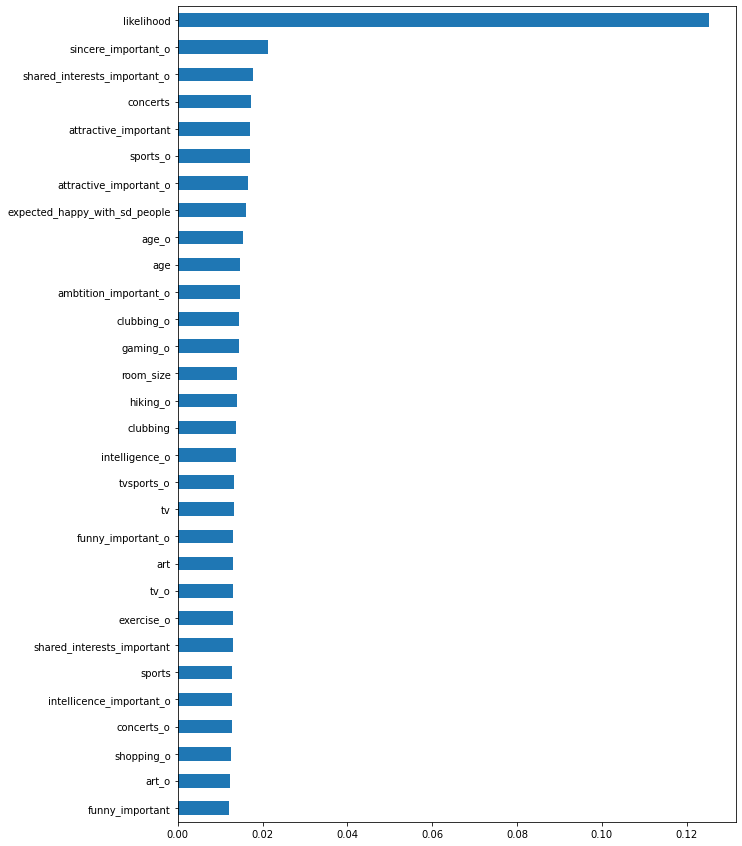

In [351]:
import matplotlib.pyplot as plt
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_test).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,15))
importances.sort_values(ascending=True).tail(30).plot.barh();

## Men's Model

In [352]:
train, test = train_test_split(men, random_state=42)
print(train.shape, test.shape)

(3145, 78) (1049, 78)


In [353]:
X_train = wrangle(train)
y_train = train['decision']

X_test = wrangle(test)
y_test = test['decision']

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [354]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)
param_distributions = { 
    'randomforestclassifier__max_depth': [18,19,20,21,22,23,24,25,26,27], 
    'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=15, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(co

In [355]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))

Best hyperparameters {'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 19}
Cross-validation Accuracy -0.731637519872814
Train Accuracy: 0.9977742448330683
Test Accuracy: 0.7225929456625357


In [268]:
men.decision.value_counts(normalize=True)

0    0.525751
1    0.474249
Name: decision, dtype: float64

In [356]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       532
           1       0.75      0.65      0.70       517

    accuracy                           0.72      1049
   macro avg       0.73      0.72      0.72      1049
weighted avg       0.73      0.72      0.72      1049



In [357]:
dump(pipeline, 'men.joblib', compress=True)

['men.joblib']

In [358]:
from google.colab import files
files.download('men.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

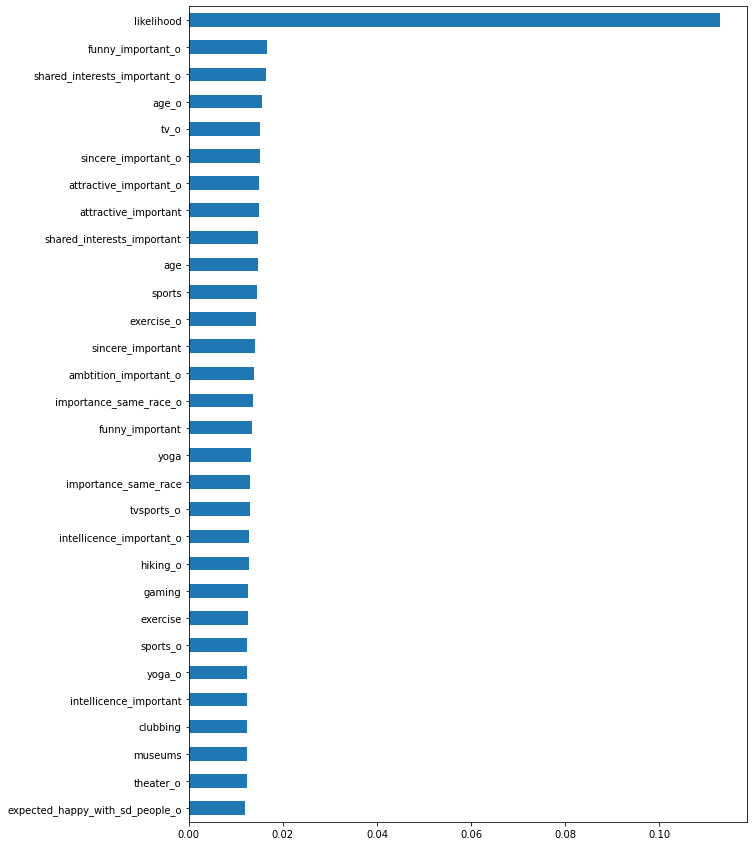

In [359]:
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_test).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,15))
importances.sort_values(ascending=True).tail(30).plot.barh();